## Assignment 3

**TU Delft and WUR**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>



__This homework assignment document will guide you through five tasks in cleaning your data.__

1. Reading and Summarizing the Data.
2. Subsetting the Data.
3. Manage Missing Data.
4. Shape the Data.
5. Saving the Results. 

# NB: From now on you should submit 1) your notebook with the answers, remember that comments are good practice, 2) a working Git page with your assignment

## Exercise 1: Loading the data:

- Load the `goodreads.csv` file into Python
- Explore it by looking at first and last 5 rows
- Change the column names to `["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name']`



In [1]:
import pandas as pd

# Load the database
f = "C:/Users/joche/Documents/MADE/Period 1/Data 1/lab-02/data/goodreads.csv"
db = pd.read_csv(f, header=None)

# Check its shape
db.shape
# Check the head and tail
# db.head(5)
# db.tail(5)
# Replace the columns
db.columns = ["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name']
# Print the first 4 rows with the newly named columns. Changed it to string for better readability
print(db.head(5).to_string(index=False))


 rating  review_count       isbn        booktype                                                   author_url   year                                                                                                                                                                                                                                                                                        genre_urls                                                    dir  rating_count                                                         name
   4.40      136455.0 0439023483 good_reads:book https://www.goodreads.com/author/show/153394.Suzanne_Collins 2008.0                                             /genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action                    dir01/2767052-the-hunger-games.html  

## Exercise 2: Subsetting the data

- Subset the data by creating new dataframe only with `["rating", 'isbn', 'author_url', 'year', 'genre_urls', 'name']`

In [3]:
db.columns = ["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name']

# The column names desired
desired_columns = ['rating', 'isbn', 'author_url', 'year', 'genre_urls', 'name']
new_db = db[desired_columns]

# Display the new database.
print(new_db.head().to_string(index=False))


 rating       isbn                                                   author_url   year                                                                                                                                                                                                                                                                                        genre_urls                                                         name
   4.40 0439023483 https://www.goodreads.com/author/show/153394.Suzanne_Collins 2008.0                                             /genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action                      The Hunger Games (The Hunger Games, #1)
   4.41 0439358078    https://www.goodreads.com/author/show/1077326.J_K_Rowling 2003.0                                      

## Exercise 3: Manage Missing Data
We’ve got a number of ways in general of dealing with missing data. These involve

1. Dropping off cases (or rows) in the data with any missing variables
2. Excluding variables in the data with any missing data 
3. Selectively choosing indicators with only a limited amount of missing data
4. Replacing missing variables with averages, or other representative values
5. Creating a separate model to predict missing data

- Count the missing values in each column
- Manage the missing values (delete or replace values or leave them as they are) and briefly explain your choice for each column


In [4]:
import pandas as pd

# Steps from previous exercise
db.columns = ["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name']
desired_columns = ['rating', 'isbn', 'author_url', 'year', 'genre_urls', 'name']
subset_db = db[desired_columns]

# added this later to prevent a "FutureWarning"
subset_db = subset_db.astype(str)
# give me a sum of al the values missing per column
missing_values = [db.isnull().sum()]
# print(missing_values)

# change all the missing values with 'Unknown'
subset_db.fillna('Unknown', inplace=True)
print(subset_db.isnull().sum())

# Chose not to delete data or randomly fill in data using functions like mean or median to prevent misunderstanding of the data. 
# When having the full row, the missing data could easily be found via the internet.

rating        0
isbn          0
author_url    0
year          0
genre_urls    0
name          0
dtype: int64


## Exercise 4: Shape the data
- Parse the `author_url` to create new column named `author`
- Sort the data by putting higher rates go first. If there are overlapping rates, try to put earlier years go first.
- **(Stretch Goal)** Examine how many books were published at each year and find lowest, highest rate of each year. 

In [5]:
# Check the author_url
one_string = db.author_url[0]
one_string

#  extract column and use the rule to get the author name based on its url. Return "Unknown" as this was set during the previoius exercise and is explained in the labs.
def extract_author(author_url):
    try:
        return author_url.split('/')[-1].split('.')[1:][0]
    except IndexError:
        return "Unknown" 
subset_db['author'] = subset_db['author_url'].apply(extract_author)
# and sort it by rating from best to worst.
sorted_db = subset_db.sort_values(by=['rating'], ascending=[False])

print(sorted_db[['author', 'rating', 'year']])    

# the stats can be arranged using this function below.
book_statistics = db.groupby('year').agg(
    number_books=('rating', 'size'),           # Count number of books published each year
    lowest_rating=('rating', 'min'),        # With this I can find the lowest rating for each year
    highest_rating=('rating', 'max')        # With this I can find the highest rating for each year
).reset_index()

# And eventually print the statistics
print(book_statistics)

                author rating    year
3643           Unknown    nan     nan
5282           Unknown    nan     nan
5692  Subhajit_Ganguly    5.0  2012.0
4473       Ronda_Paige    5.0  2012.0
2903    Rebekah_McClew    5.0  2012.0
...                ...    ...     ...
5113  Karen_Joy_Fowler   3.01  2004.0
5844      Adolf_Hitler   2.97  1925.0
2609     Mary_Williams    2.9  2013.0
5979   Gregory_Maguire   2.77  2001.0
3738     Victoria_Foyt    2.0  2011.0

[6000 rows x 3 columns]
       year  number_books  lowest_rating  highest_rating
0   -1500.0             1           3.60            3.60
1    -800.0             2           3.68            4.01
2    -560.0             1           4.03            4.03
3    -512.0             1           3.92            3.92
4    -500.0             1           4.06            4.06
..      ...           ...            ...             ...
288  2010.0           317           3.08            4.93
289  2011.0           374           2.00            5.00
290  2

## Exercise 5: Saving the results
- Save the cleaned dataframe as 'hw-03-cleaned.csv' in data folder

In [6]:
# saved to my computer yay!
book_statistics.to_csv('C:/Users/joche/Documents/MADE/Period 1/Data 1/lab-02/data/yearly_stats.csv', index=False)

## Exercise 6: Investigate the relationship between the number of reviews and the average rating for books in the dataset cleaned-goodreads.csv provided.

- Calculate the correlation coefficient. Give me a short definition of this coefficient
- Create a scatter plot showing the relationship between these two features.
- Based on the plot and the correlation, provide a brief interpretation of the relationship.

### Python Tools: Use pandas and numpy for correlation, and matplotlib or seaborn for the scatter plot.

In [7]:
import pandas as pd
import numpy as np

# print(db.columns)

# Firs create a list with the two wanted variables.
num_reviews = db['review_count']
avg_rating = db['rating']

# Calculate the correlation coefficient using pandas
correlation = num_reviews.corr(avg_rating)

print(f"Correlation Coefficient: {correlation}")

# The correlation coefficient is a number (between -1 and 1) that tells me the strength and direction of a relation between to variables. In this case, the correlation coefficient shows the relation between number of reviews and the average rating for books.
# it shows that if one variable changes, the other variable would change in the same direction. As the number is very low (-0.037), it can be concluded that there is a weak correlation between the two. Both can be considered independent.

Correlation Coefficient: -0.03816911084805155


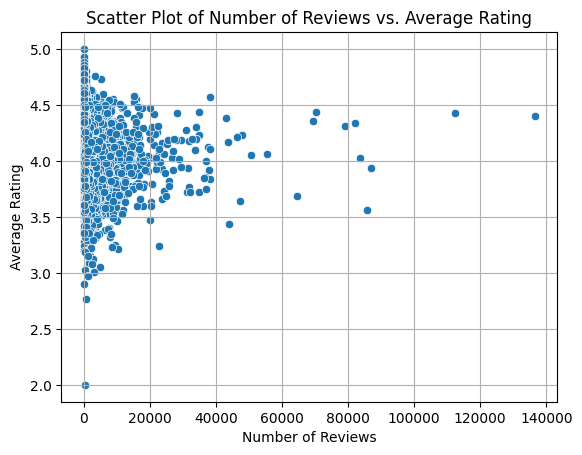

In [9]:
# The creation of a scatterplot

import seaborn as sns
import matplotlib.pyplot as plt

# use seaborn to produce the scatterplot with the amount of reviews on the x axes and the average rating on the y axes. The other way around does not look really nice.
sns.scatterplot(x=num_reviews, y=avg_rating, alpha=1)

# add names to the axes and title to make the graph better.
plt.title('Scatter Plot of Number of Reviews vs. Average Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

# Based on the plot as well as the correlation number, there is no strong relationship between the amount of reviews and the rating.

## Exercise 7: Calculate the following descriptive statistics for the numerical features (e.g., number of reviews, average rating, etc.):
- Mean
- Median
- Standard Deviation
- Range
- Create a histogram or box plot for at least one of the numerical features, highlighting any skewness or outliers.
    
### Python Tools: Use pandas for data manipulation and matplotlib or seaborn for visualization.

           review_count    rating         year
mean        2372.487162  4.042201  1969.085099
median       932.500000  4.050000  2002.000000
std         5491.177007  0.260661   185.383169
<lambda>  136455.000000  3.000000  3514.000000


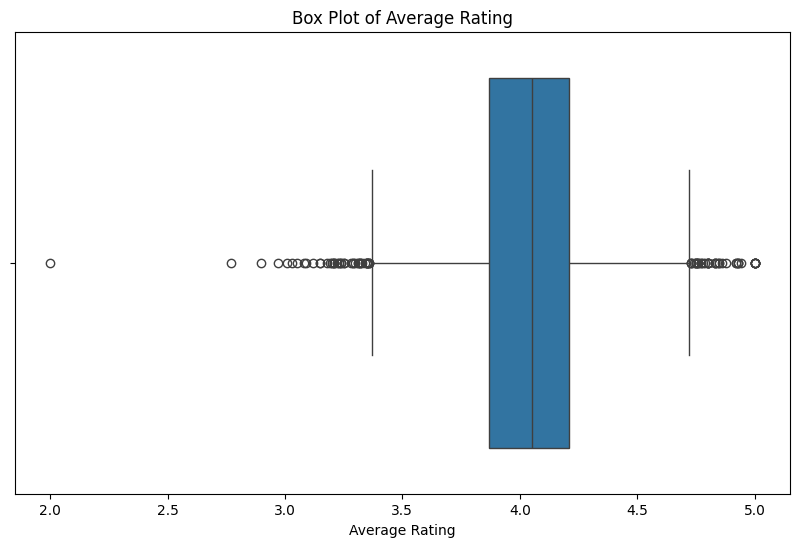

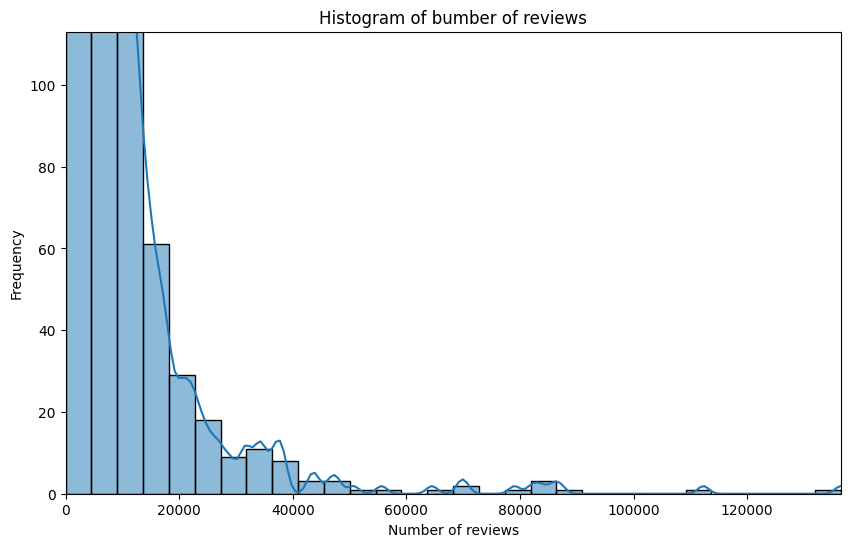

In [10]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate descriptive statistics mean, median, standard eviation and range
numerical_features = ['review_count', 'rating', 'year']
descriptive_stats = db[numerical_features].agg(['mean', 'median', 'std', lambda x: x.max() - x.min()])
print(descriptive_stats)

# Box plot for average_rating
plt.figure(figsize=(10, 6))
sns.boxplot(x=db['rating'])
plt.title('Box Plot of Average Rating')
plt.xlabel('Average Rating')
plt.show()

#Histogram for number of reviews
plt.figure(figsize=(10, 6))
sns.histplot(db['review_count'], bins=30, kde=True)
plt.title('Histogram of bumber of reviews')
plt.xlabel('Number of reviews')

#zooming in of a smaller data frame
plt.xlim(0, db['review_count'].max())  
plt.ylim(0, db['rating'].value_counts().max())

plt.ylabel('Frequency')
plt.show()
